In [19]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.constants as sc

Seaborn setup.

In [20]:
#sns.set_context('paper') # try: 'talk', 'poster', 'notebook'
sns.set_theme(style="ticks")

sns_palette_historic = ["m"]
sns_palette_modern = ["g"]

sns_xlim = (-0.1, 1.1)
sns_ylim = (0.2, 0.9)

sns_plot_size = (7*sc.golden_ratio, 7)

Load dataframes as generated by the other two notebooks.

In [21]:
with open("niner.pkl", mode="rb") as pkl_file:
    df_niner = pickle.load(pkl_file)
with open("single.pkl", mode="rb") as pkl_file:
    df_single = pickle.load(pkl_file)

In [22]:
means = []
for img in df_niner[df_niner["type"] == "H"]["id"].unique():
    means.append((
        img,
        "H",
        np.mean(df_niner[df_niner["id"] == img]["normalise"]),
        np.mean(df_single[df_single["id"] == img]["normalise"])
    ))

#for img in df[df["type"] == "I"]["id"].unique():
#    means.append((img, "I", np.mean(df[df["id"] == img]["normalise"])))
    
df = pd.DataFrame(means)
df.columns = ["id", "type", "mean_niner", "mean_single"]
#df = df.sort_values(by='mean_niner', ascending=True)

In [23]:
means = []
for img in df_niner[df_niner["type"] == "I"]["id"].unique():
    means.append((
        img,
        "I",
        np.mean(df_niner[df_niner["id"] == img]["normalise"]),
        np.mean(df_single[df_single["id"] == img]["normalise"])
    ))

#for img in df[df["type"] == "I"]["id"].unique():
#    means.append((img, "I", np.mean(df[df["id"] == img]["normalise"])))
    
df_concat = pd.DataFrame(means)
df_concat.columns = ["id", "type", "mean_niner", "mean_single"]


In [24]:
df = pd.concat((df, df_concat.sort_values(by='mean_niner', ascending=True)))

## Dataframe

In [25]:
df

,id,type,mean_niner,mean_single
0,H0,H,0.274247,0.467593
1,H1,H,0.150414,0.564815
2,H2,H,0.292308,0.606481
3,H3,H,0.291694,0.277778
4,H4,H,0.427191,0.351852
5,H5,H,0.270476,0.328704
6,H6,H,0.324769,0.425926
7,H7,H,0.174331,0.370370
8,H8,H,0.154161,0.481481
9,H9,H,0.287614,0.402778


correlation coefficient: r = -0.3227323562815447


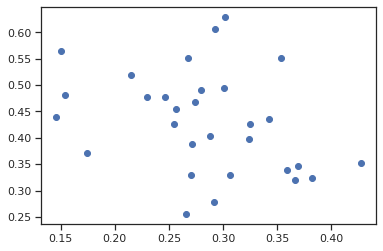

In [26]:
plt.scatter(
    df[df["type"] == "H"]["mean_niner"],
    df[df["type"] == "H"]["mean_single"]
)

r, p = stats.pearsonr(
    df[df["type"] == "H"]["mean_niner"],
    df[df["type"] == "H"]["mean_single"]
)
print(f'correlation coefficient: r = {r}')

correlation coefficient: r = -0.6402816853662636


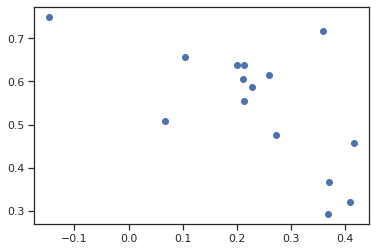

In [27]:
plt.scatter(
    df[df["type"] == "I"]["mean_niner"],
    df[df["type"] == "I"]["mean_single"]
)

r, p = stats.pearsonr(
    df[df["type"] == "I"]["mean_niner"],
    df[df["type"] == "I"]["mean_single"]
)
print(f'correlation coefficient: r = {r}')

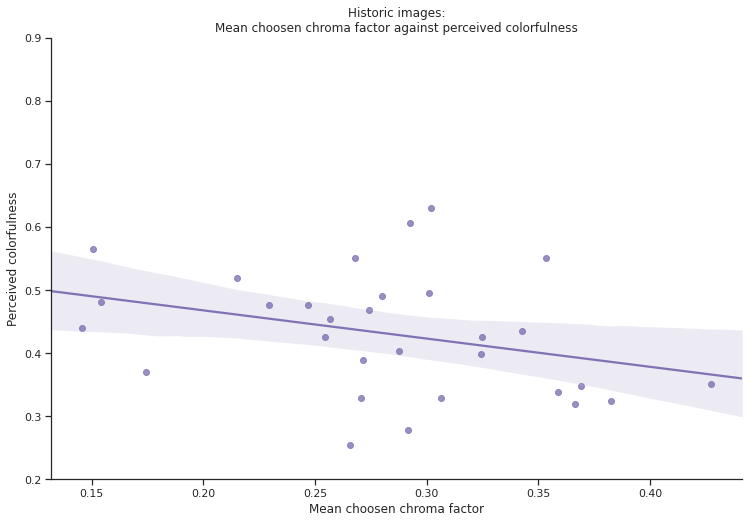

In [32]:
g = sns.lmplot(
    x="mean_niner",
    y="mean_single",
    data=df[df["type"] == "H"],
    #kind="reg",
    truncate=False,
    legend=False,
    height=7,
    hue="type",
    palette=[sns_palette_historic[0]]
    )

#g.set(xlim=(-0.1, 0.5))
g.set(ylim=sns_ylim)
g.figure.set_size_inches(sns_plot_size)

g.set(title="Historic images:\nMean choosen chroma factor against perceived colorfulness")
g.set(xlabel="Mean choosen chroma factor")
g.set(ylabel="Perceived colorfulness")

g.savefig("regression_historic.png", dpi=400)

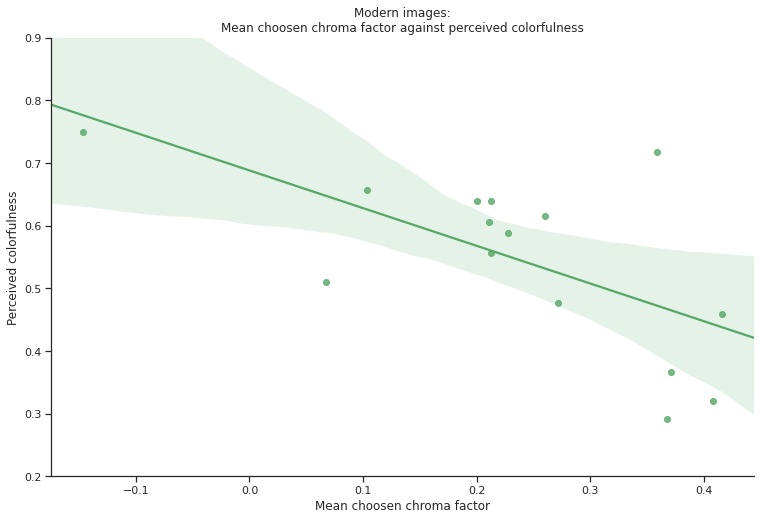

In [31]:
g = sns.lmplot(
    x="mean_niner",
    y="mean_single",
    data=df[df["type"] == "I"], # Select modern images.
    truncate=False,
    legend=False,
    height=7,
    hue="type",
    palette=[sns_palette_modern[0]]
    )

g.figure.set_size_inches(sns_plot_size)
g.set(ylim=sns_ylim)
g.set(title="Modern images:\nMean choosen chroma factor against perceived colorfulness")
g.set(xlabel="Mean choosen chroma factor")
g.set(ylabel="Perceived colorfulness")

g.savefig("regression_modern.png", dpi=400)